In [157]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [158]:
mytable = pd.read_table("https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv",sep=",")
newTable = mytable[(mytable.angle == 30)]
h = newTable.h
angle = newTable.angle
y = newTable.y
sigmay = newTable.sigmay

In [159]:
angle = angle*np.pi/180
angle

20    0.523599
21    0.523599
22    0.523599
23    0.523599
24    0.523599
25    0.523599
26    0.523599
27    0.523599
28    0.523599
29    0.523599
Name: angle, dtype: float64

In [160]:
def modCoriolis(omega,h,lamb,g):
    res = 2*np.sqrt(2)/3*omega*np.cos(lamb)*np.sqrt(h**3/g)
    return res

In [161]:
def Chi2(omega,y,h,lamb,g,sigmay):
    return np.sum (  (y-modCoriolis(omega,h,lamb,g))**2/(2*sigmay**2) )

In [162]:
nll = lambda *p: Chi2(*p)

In [163]:
result = sp.optimize.minimize(nll,0,args=(y,h,angle,9.81,sigmay),options={'disp':True})
result.x

         Current function value: 1.145718
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 47


array([7.24399826e-05])

In [164]:
h_ = np.linspace(0,100,1000)

<ErrorbarContainer object of 3 artists>

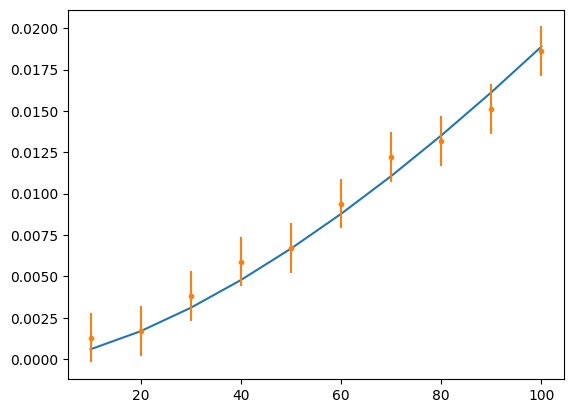

In [165]:
plt.plot(h,modCoriolis(result.x,h,30*np.pi/180,9.81))
plt.errorbar(h,y,yerr=sigmay,fmt='.')

In [166]:
Gravedad = np.zeros(300)
Omega_ = []


for i in range(300):
    Gravedad[i] = 9.81 + np.random.normal(loc=0,scale=1)


    yBoot = y + np.random.normal( loc=0, scale=sigmay.loc[sigmay.index[0]], size=len(y))

    

    result = sp.optimize.minimize(nll,0,args=(yBoot,h,angle,Gravedad[i],sigmay),options={'disp':True})
    Omega_.append(result.x[0])

Omega = np.array(Omega_)

         Current function value: 5.226841
         Iterations: 1
         Function evaluations: 68
         Gradient evaluations: 28
         Current function value: 8.697748
         Iterations: 1
         Function evaluations: 114
         Gradient evaluations: 51
         Current function value: 3.579175
         Iterations: 1
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 2.241358
         Iterations: 1
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 8.569077
         Iterations: 1
         Function evaluations: 46
         Gradient evaluations: 17
         Current function value: 6.615289
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 4.448738
         Iterations: 1
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 11.557518
         Iterations: 1


In [167]:
Omega

array([7.14622235e-05, 7.55401713e-05, 7.33912038e-05, 7.77751406e-05,
       7.02185984e-05, 6.33107748e-05, 7.07624388e-05, 7.28346851e-05,
       7.06915809e-05, 6.63366420e-05, 7.20918430e-05, 7.71024657e-05,
       7.46048904e-05, 6.97815212e-05, 7.31884988e-05, 6.91875100e-05,
       7.20923714e-05, 6.31550539e-05, 7.84319871e-05, 7.57659532e-05,
       7.44206013e-05, 7.67523193e-05, 7.68438835e-05, 7.96918579e-05,
       7.65072357e-05, 7.80443364e-05, 7.43257123e-05, 7.14831494e-05,
       7.48464607e-05, 7.62092177e-05, 7.53982619e-05, 7.13077584e-05,
       6.64971070e-05, 8.12013387e-05, 6.91867186e-05, 8.41597724e-05,
       7.55965408e-05, 8.32271814e-05, 8.15451126e-05, 7.08635810e-05,
       7.16459281e-05, 8.18692177e-05, 6.40215322e-05, 7.66633438e-05,
       7.93236672e-05, 7.33371139e-05, 7.60548331e-05, 6.91090529e-05,
       8.15169511e-05, 7.08685818e-05, 7.02540550e-05, 6.93863644e-05,
       6.97309250e-05, 7.16456846e-05, 8.14438736e-05, 7.43918131e-05,
      

C:\Users\Camelo\AppData\Local\Temp\ipykernel_19592\4189875030.py:3: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(H2,aspect = 'auto',extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))


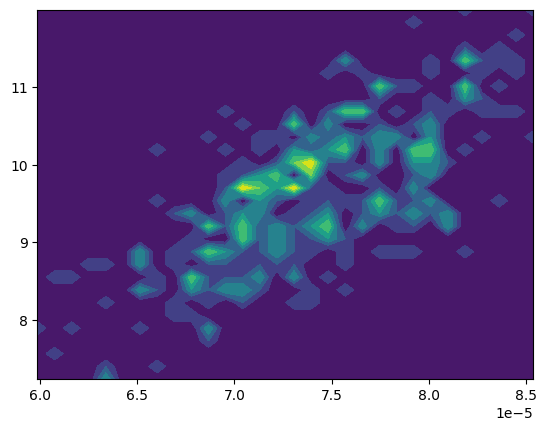

In [168]:
H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(30,30))

plt.contourf(H2,aspect = 'auto',extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))


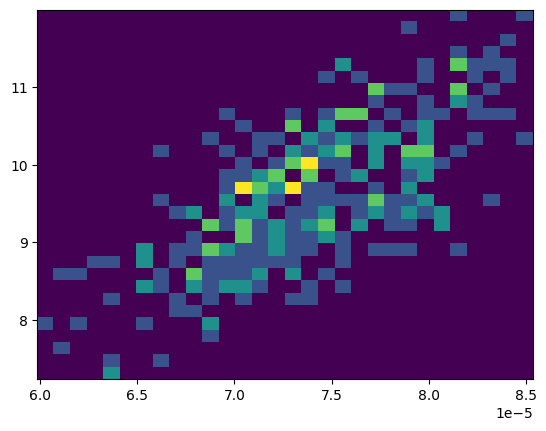

In [169]:
plt.imshow(H2,origin='lower',aspect = 'auto',extent = (Omega.min(),Omega.max(),Gravedad.min(),Gravedad.max()))

Basandonos en las graficas, podemos decir que ambos parametros están correlacionados. Esto lo concluimos basados en el hecho de que la grafica desmuestra una tendencia positiva evidente. De no estar correlacionados, no se podría deducir ninguna tendencia.

In [170]:
H1 = np.sum(H2,axis=1)
H1

array([ 2.,  2.,  1.,  1.,  5.,  2.,  6., 13., 14., 12., 20., 12., 22.,
       21., 18., 19., 16., 18., 20., 17., 10., 15.,  5.,  9.,  5.,  9.,
        2.,  1.,  1.,  2.])

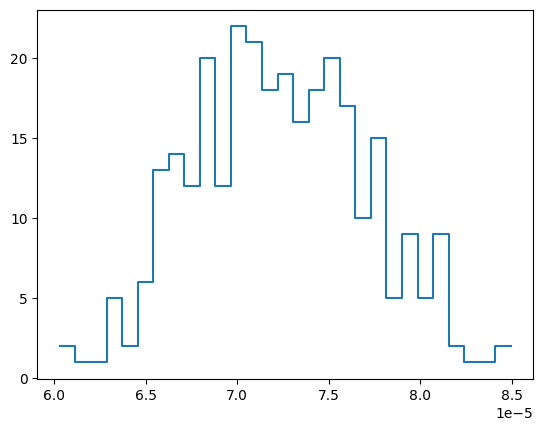

In [171]:
mid_bins = 0.5*(binsx[1:]+binsx[:-1])
plt.step(mid_bins,H1)

In [172]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16) )
ii = np.searchsorted( cs, np.percentile(cs,50) )
ji = np.searchsorted( cs, np.percentile(cs,84) )
print(ij)
print(ii)
print(ji)

5
15
25


In [173]:
print(mid_bins[ij],mid_bins[ii],mid_bins[ji])

6.45480391064381e-05 7.305349649696995e-05 8.155895388750178e-05


In [174]:
table10 = mytable[(mytable.angle == 10)]
table20 = mytable[(mytable.angle == 20)]
table30 = mytable[(mytable.angle == 30)]
table40 = mytable[(mytable.angle == 40)]
table50 = mytable[(mytable.angle == 50)]
table60 = mytable[(mytable.angle == 60)]

In [204]:
def modelo(table):

    h = table.h
    angle = table.angle
    y = table.y
    sigmay = table.sigmay

    angle = angle*np.pi/180

    Gravedad = np.zeros(300)
    Omega_ = []


    for i in range(300):
        Gravedad[i] = 9.81 + np.random.normal(loc=0,scale=1)


        yBoot = y + np.random.normal( loc=0, scale=sigmay.loc[sigmay.index[0]], size=len(y))

        

        result = sp.optimize.minimize(nll,0,args=(yBoot,h,angle,Gravedad[i],sigmay),options={'disp':True})
        Omega_.append(result.x[0])

    Omega = np.array(Omega_)

    H2,binsx,binsy = np.histogram2d(Omega,Gravedad,bins=(30,30))
    mid_bins = 0.5*(binsx[1:]+binsx[:-1])
    cs = np.cumsum(H1)
    ij = np.searchsorted( cs, np.percentile(cs,16) )
    ii = np.searchsorted( cs, np.percentile(cs,50) )
    ji = np.searchsorted( cs, np.percentile(cs,84) )

    return(mid_bins[ij].round(10),mid_bins[ii],mid_bins[ji].round(10))
    

In [205]:
min10,mid10,max10 = modelo(table10)

         Current function value: 11.094494
         Iterations: 1
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 7.726012
         Iterations: 1
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 10.382097
         Iterations: 1
         Function evaluations: 80
         Gradient evaluations: 34
         Current function value: 18.391162
         Iterations: 1
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 3.896331
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 6.440062
         Iterations: 1
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 3.663525
         Iterations: 1
         Function evaluations: 92
         Gradient evaluations: 40
         Current function value: 7.064679
         Iterations: 

In [206]:
min20,mid20,max20 =modelo(table20)

         Current function value: 2.314381
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 4.736940
         Iterations: 1
         Function evaluations: 64
         Gradient evaluations: 26
         Current function value: 9.532252
         Iterations: 1
         Function evaluations: 110
         Gradient evaluations: 49
         Current function value: 5.555586
         Iterations: 1
         Function evaluations: 128
         Gradient evaluations: 58
         Current function value: 6.642845
         Iterations: 1
         Function evaluations: 118
         Gradient evaluations: 53
         Current function value: 7.908981
         Iterations: 1
         Function evaluations: 72
         Gradient evaluations: 30
         Current function value: 9.292065
         Iterations: 1
         Function evaluations: 56
         Gradient evaluations: 22
         Current function value: 7.046466
         Iterations: 1


In [207]:
min30,mid30,max30 =modelo(table30)

         Current function value: 3.682976
         Iterations: 1
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 2.573827
         Iterations: 1
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 4.203589
         Iterations: 1
         Function evaluations: 102
         Gradient evaluations: 45
         Current function value: 3.938983
         Iterations: 1
         Function evaluations: 108
         Gradient evaluations: 48
         Current function value: 5.158784
         Iterations: 1
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 2.902396
         Iterations: 1
         Function evaluations: 52
         Gradient evaluations: 20
         Current function value: 9.099187
         Iterations: 1
         Function evaluations: 54
         Gradient evaluations: 21
         Current function value: 6.402869
         Iterations: 1
  

In [208]:
min40,mid40,max40 =modelo(table40)

         Current function value: 2.036208
         Iterations: 1
         Function evaluations: 108
         Gradient evaluations: 48
         Current function value: 2.571779
         Iterations: 1
         Function evaluations: 118
         Gradient evaluations: 53
         Current function value: 9.038959
         Iterations: 1
         Function evaluations: 114
         Gradient evaluations: 51
         Current function value: 8.250046
         Iterations: 1
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 6.853587
         Iterations: 1
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 9.365091
         Iterations: 1
         Function evaluations: 104
         Gradient evaluations: 46
         Current function value: 6.068854
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 8.976255
         Iterations: 1

In [209]:
min50,mid50,max50 =modelo(table50)

         Current function value: 4.347324
         Iterations: 1
         Function evaluations: 48
         Gradient evaluations: 18
         Current function value: 6.688662
         Iterations: 1
         Function evaluations: 78
         Gradient evaluations: 33
         Current function value: 7.502906
         Iterations: 1
         Function evaluations: 52
         Gradient evaluations: 20
         Current function value: 4.273978
         Iterations: 1
         Function evaluations: 62
         Gradient evaluations: 25
         Current function value: 9.021066
         Iterations: 1
         Function evaluations: 106
         Gradient evaluations: 47
         Current function value: 6.934465
         Iterations: 1
         Function evaluations: 88
         Gradient evaluations: 38
         Current function value: 6.390769
         Iterations: 1
         Function evaluations: 66
         Gradient evaluations: 27
         Current function value: 5.251429
         Iterations: 1
   

In [210]:
minTot,midTot,maxTot =modelo(mytable)

         Current function value: 43.858426
         Iterations: 1
         Function evaluations: 90
         Gradient evaluations: 39
         Current function value: 47.847305
         Iterations: 1
         Function evaluations: 100
         Gradient evaluations: 44
         Current function value: 32.637961
         Iterations: 1
         Function evaluations: 98
         Gradient evaluations: 43
         Current function value: 44.863750
         Iterations: 1
         Function evaluations: 58
         Gradient evaluations: 23
         Current function value: 31.161508
         Iterations: 1
         Function evaluations: 48
         Gradient evaluations: 18
         Current function value: 39.827483
         Iterations: 1
         Function evaluations: 94
         Gradient evaluations: 41
         Current function value: 33.451030
         Iterations: 1
         Function evaluations: 112
         Gradient evaluations: 50
         Current function value: 34.290611
         Iteratio

In [246]:
tablaResultados = {
    '\u03BB':['10','20','30','40','50','Combinado'],
    '\u03C9':[mid10,mid20,mid30,mid40,mid50,midTot],
    'IC 68%':[[min10,max10],[min20,max20],[min30,max30],[min40,max40],[min50,max50],[minTot,maxTot]],
    'ErrorR':[(max10-min10)/(2*mid10),(max20-min20)/(2*mid20),(max30-min30)/(2*mid30),(max40-min40)/(2*mid40),(max50-min50)/(2*mid50),(maxTot-minTot)/(2*midTot)]
}

pd.set_option('display.float_format', '{:.4g}'.format)
dfResultados = pd.DataFrame(tablaResultados)
print(dfResultados)

           λ         ω              IC 68%  ErrorR
0         10 6.996e-05  [6.2e-05, 7.8e-05]  0.1144
1         20 7.121e-05    [6.2e-05, 8e-05]  0.1264
2         30   7.3e-05  [6.2e-05, 8.4e-05]  0.1507
3         40  7.66e-05  [6.7e-05, 8.6e-05]   0.124
4         50  6.92e-05    [6e-05, 7.9e-05]  0.1373
5  Combinado 7.182e-05  [6.4e-05, 7.9e-05]  0.1044


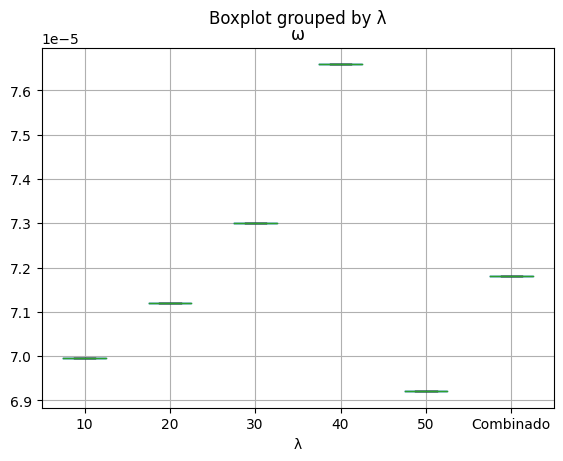

In [248]:
ax = dfResultados.boxplot(column='ω',by='λ')